# Import Library

In [52]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import ssl
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Download Data

In [54]:
ssl._create_default_https_context = ssl._create_unverified_context
Datagrep=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [55]:
#Datagrep=Datagrep.iloc[:,0:755]

# Transform Data

In [56]:
Datagrep

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/22,3/6/22,3/7/22,3/8/22,3/9/22,3/10/22,3/11/22,3/12/22,3/13/22,3/14/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,174331,174582,175000,175353,175525,175893,175974,176039,176201,176409
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,272030,272210,272250,272337,272412,272479,272552,272621,272663,272689
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,265227,265265,265297,265323,265346,265366,265391,265410,265432,265457
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,38434,38434,38620,38710,38794,38794,38794,38794,38794,38794
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,98796,98806,98806,98829,98855,98855,98855,98909,98927,98931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,649971,649971,651700,652298,652763,652966,653293,653293,653293,653854
280,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,530,532,532,533,533,535,535,535,535,535
281,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11775,11777,11781,11781,11781,11783,11783,11784,11784,11793
282,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,313744,313821,313910,314159,314641,314850,314986,315148,315202,315202


In [57]:
countries_JH=Datagrep['Country/Region'].unique().tolist()
dates_JH=list(Datagrep)[4:]
print(countries_JH[0:4])
print(len(countries_JH))
print(dates_JH[-2:])
print(len(dates_JH))

['Afghanistan', 'Albania', 'Algeria', 'Andorra']
198
['3/13/22', '3/14/22']
783


In [58]:
N=[]
for c in countries_JH:
    L=Datagrep[Datagrep['Country/Region']==c][dates_JH].sum().values.tolist()
    N.append(L)
Data_df=pd.DataFrame(np.array(N).T).rename(columns={i:countries_JH[i] for i in range(len(countries_JH))}) 

In [59]:
Data_df

,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,175893,272479,265366,38794,98855,11,7461,8961595,421714,3527894,...,860663,237059,102,517720,5260495,652966,535,11783,314850,241548
779,175974,272552,265391,38794,98855,11,7466,8967210,421842,3562971,...,862153,237129,164,517720,5448935,653293,535,11783,314986,241548
780,176039,272621,265410,38794,98909,11,7466,8970196,421953,3596466,...,863365,237169,207,517999,5903147,653293,535,11784,315148,242069
781,176201,272663,265432,38794,98927,11,7466,8971432,422004,3622906,...,864376,237238,207,518410,6112648,653293,535,11784,315202,242515


In [60]:
Datah_nc=[]
for c in countries_JH:
    L=Data_df[c].to_list()
    L1=[]
    L1.append(L[0])
    for i in range(1,len(L)-1):
        L1.append([L[i+1]-L[i] if L[i+1]-L[i]>=0 else 0][0])
    Datah_nc.append(L1)  
Data_nc=pd.DataFrame(np.array(Datah_nc).T).rename(columns={i:countries_JH[i] for i in range(len(countries_JH))}) 
Df=Data_nc.copy()

In [61]:
Df

,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,368,67,20,0,0,0,0,6137,122,31689,...,1498,14,7,556,218459,203,2,2,209,1205
778,81,73,25,0,0,0,5,5615,128,35077,...,1490,70,62,0,188440,327,0,0,136,0
779,65,69,19,0,54,0,0,2986,111,33495,...,1212,40,43,279,454212,0,0,1,162,521
780,162,42,22,0,18,0,0,1236,51,26440,...,1011,69,0,411,209501,0,0,0,54,446


In [62]:
Df['US']

0          1
1          1
2          0
3          3
4          0
       ...  
777    48318
778    52110
779    10462
780     5736
781    39024
Name: US, Length: 782, dtype: int32

In [63]:
Data_df['US']

0             1
1             1
2             2
3             2
4             5
         ...   
778    79454920
779    79507030
780    79517492
781    79523228
782    79562252
Name: US, Length: 783, dtype: int32

# Visualize Data

Text(0.5, 1.0, 'US COVID-19 Cases')

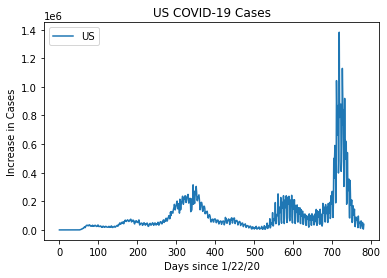

In [64]:
#Data_df['US'].plot()
#Data_df.plot()
#Data_df.plot(y=['US','China'])
Df.plot(y=['US'])
plt.xlabel('Days since 1/22/20')
plt.ylabel('Increase in Cases')
plt.title('US COVID-19 Cases')

# PCA

In [65]:
X=Df.values
sc=StandardScaler()
X_std=sc.fit_transform(X)

In [66]:
X_std

array([[-0.5852375 , -0.75168686, -0.94499761, ..., -0.58017687,
        -0.52654909, -0.38361696],
       [-0.5852375 , -0.75168686, -0.94499761, ..., -0.58017687,
        -0.52654909, -0.38361696],
       [-0.5852375 , -0.75168686, -0.94499761, ..., -0.58017687,
        -0.52654909, -0.38361696],
       ...,
       [-0.41661644, -0.60294775, -0.89210477, ..., -0.5417083 ,
        -0.3149218 ,  0.25979324],
       [-0.16498193, -0.66115001, -0.88375327, ..., -0.58017687,
        -0.45600666,  0.16717181],
       [-0.0456501 , -0.69564024, -0.87540177, ..., -0.23395974,
        -0.52654909,  0.10295429]])

In [67]:
pca=PCA()
X_pca=pca.fit_transform(X_std)

Text(0, 0.5, 'cumulative variance explained')

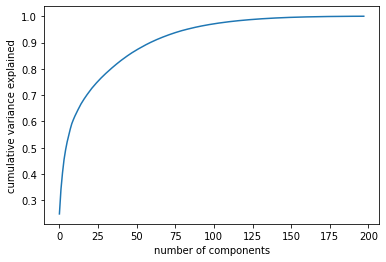

In [68]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative variance explained')

In [69]:
pca = PCA(n_components = 0.99)
X_pca = pca.fit_transform(X_std) # fit and reduce dimensions
print(pca.n_components_) # print and see how many components are selected

132


In [70]:
pd.DataFrame(pca.components_, columns = Df.columns)

,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,0.007044,0.085401,0.073752,0.067677,0.045123,0.001248,0.059787,0.108998,6.520185e-02,0.111651,...,0.122887,0.068683,0.011401,0.059618,0.038192,0.061023,0.072258,0.042389,0.044921,0.019580
1,0.014725,0.049298,0.048079,0.051371,0.109923,0.000315,0.024712,0.100536,-8.841037e-02,0.052014,...,-0.013406,0.036139,-0.055695,0.008347,-0.091127,-0.050581,-0.065277,-0.003351,0.136113,0.056338
2,0.122933,-0.047360,0.121775,-0.068549,-0.028932,-0.007956,-0.005285,-0.029127,6.354804e-07,-0.071438,...,-0.006334,0.155784,-0.005638,0.105139,0.011326,0.012183,0.012856,0.028548,0.006164,0.053681
3,-0.016109,-0.046406,-0.068012,0.018666,0.070853,0.015589,-0.022159,-0.041543,-1.038296e-01,0.058672,...,-0.071648,-0.084486,0.131425,-0.095587,0.204810,-0.047722,-0.075018,-0.103198,0.117663,0.116555
4,0.201287,-0.113552,0.030900,0.026767,-0.048961,-0.011195,-0.058959,0.116621,-1.504668e-01,0.065514,...,0.106420,-0.017096,0.061349,-0.010478,0.056889,-0.059428,0.026433,-0.081330,0.084114,-0.000320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,0.033840,-0.239612,-0.145614,-0.192683,0.066113,0.047345,0.060886,0.092467,6.086047e-02,0.079837,...,-0.057274,0.274388,0.068272,-0.114842,0.072336,0.054072,0.024362,-0.043719,0.016814,0.007450
128,-0.083132,-0.024381,-0.018721,-0.006748,0.111294,0.042005,-0.014119,-0.021180,-1.340396e-01,-0.034985,...,0.030697,0.098312,0.003680,0.010120,0.090319,0.052558,0.012212,0.075037,0.063428,0.011047
129,-0.243707,0.092416,0.023712,-0.009314,-0.127203,-0.013088,-0.016627,0.062074,1.657579e-03,-0.067160,...,-0.023486,-0.172718,-0.052323,0.003383,0.039776,0.059789,0.088967,0.057517,0.026243,-0.026786
130,0.094037,-0.032596,0.081864,-0.007377,0.029297,0.016096,0.136222,0.012646,2.271590e-02,-0.089452,...,-0.006844,0.040255,-0.031814,-0.060080,0.078738,-0.054109,0.065984,-0.007209,-0.087983,-0.062153


In [71]:
n_pcs= pca.n_components_ # get number of component
n_pcs=50

# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = Df.columns

# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [72]:
n_pcs

50

In [73]:
most_important_names

['Portugal',
 'Mozambique',
 'Cambodia',
 'Vietnam',
 'Syria',
 'Philippines',
 'Hungary',
 'Papua New Guinea',
 'Laos',
 'Saudi Arabia',
 'United Arab Emirates',
 'Nigeria',
 'Tajikistan',
 'Yemen',
 'Sweden',
 'Mauritius',
 'Burundi',
 'El Salvador',
 'Summer Olympics 2020',
 'Monaco',
 'Saint Vincent and the Grenadines',
 'Marshall Islands',
 'Benin',
 'Marshall Islands',
 'El Salvador',
 'Madagascar',
 'Botswana',
 'Central African Republic',
 'Central African Republic',
 'Tanzania',
 'Antarctica',
 'Holy See',
 'Micronesia',
 'Micronesia',
 'Central African Republic',
 'MS Zaandam',
 'Antarctica',
 'Micronesia',
 'Holy See',
 'Holy See',
 'Kyrgyzstan',
 'Equatorial Guinea',
 'Marshall Islands',
 'Nicaragua',
 'Marshall Islands',
 'Equatorial Guinea',
 'Honduras',
 'Benin',
 'Chad',
 'Solomon Islands']

# Regression

In [74]:
#define URL where data is located
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

#read in data
data_full = pd.read_csv(url)

#view first six rows of data
data_full[0:6]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/22,3/6/22,3/7/22,3/8/22,3/9/22,3/10/22,3/11/22,3/12/22,3/13/22,3/14/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,174331,174582,175000,175353,175525,175893,175974,176039,176201,176409
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,272030,272210,272250,272337,272412,272479,272552,272621,272663,272689
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265227,265265,265297,265323,265346,265366,265391,265410,265432,265457
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,38434,38434,38620,38710,38794,38794,38794,38794,38794,38794
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,98796,98806,98806,98829,98855,98855,98855,98909,98927,98931
5,NaN,Antarctica,-71.94990,23.347000,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11


Text(0.5, 1.0, 'US')

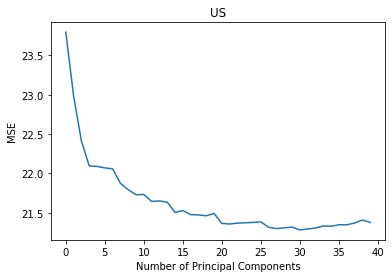

In [85]:
# define predictor and response variables
X = Df
y = Df[['US']]

#scale predictor variables
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), y, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 40):
    score = -1*model_selection.cross_val_score(regr, 
                       X_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(np.log(mse))
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('US')

In [89]:
score = -1*model_selection.cross_val_score(regr, 
                       X_reduced[:,:30], y, cv=cv, scoring='neg_mean_squared_error').mean()
print(score)

1749951326.082261


In [90]:
regr = LinearRegression()
regr.fit(X_reduced[:,:30], y)

#calculate RMSE
pred = regr.predict(X_reduced[:,:30])

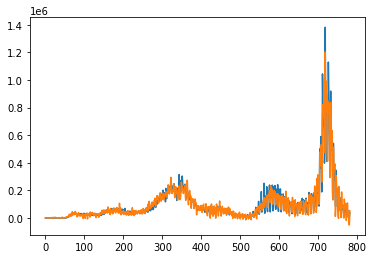

In [91]:
plt.plot(y)
plt.plot(pred)
plt.show()

In [92]:
print(len(y))

print(X_reduced.shape)

782
(782, 198)


In [93]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 24.82,  34.16,  40.45,  45.52,  49.19,  52.18,  54.7 ,  57.04,
        59.11,  60.63,  62.  ,  63.24,  64.41,  65.57,  66.66,  67.64,
        68.55,  69.43,  70.26,  71.07,  71.86,  72.62,  73.32,  74.  ,
        74.67,  75.31,  75.93,  76.54,  77.13,  77.7 ,  78.25,  78.79,
        79.32,  79.84,  80.35,  80.86,  81.36,  81.85,  82.33,  82.8 ,
        83.25,  83.69,  84.12,  84.54,  84.96,  85.37,  85.76,  86.15,
        86.52,  86.88,  87.23,  87.57,  87.9 ,  88.23,  88.55,  88.87,
        89.18,  89.48,  89.78,  90.07,  90.35,  90.62,  90.88,  91.14,
        91.39,  91.64,  91.88,  92.11,  92.34,  92.56,  92.78,  92.99,
        93.2 ,  93.4 ,  93.6 ,  93.79,  93.98,  94.16,  94.34,  94.51,
        94.67,  94.82,  94.97,  95.12,  95.27,  95.41,  95.55,  95.69,
        95.82,  95.95,  96.08,  96.2 ,  96.32,  96.44,  96.55,  96.66,
        96.76,  96.86,  96.96,  97.06,  97.15,  97.24,  97.33,  97.42,
        97.5 ,  97.58,  97.66,  97.74,  97.81,  97.88,  97.95,  98.02,
      

In [94]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#scale the training and testing data
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:1]

#train PCR model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:1], y_train)

#calculate RMSE
pred = regr.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, pred))

108383.90055783634

# PCA  Prediction 

In [95]:
lag=7
X_shift=X
y_shift=y.shift(periods=-lag)
print(len(y_shift))
print(type(y))
print(type(y_shift))

782
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [96]:
print(y[-(lag+1):])
print(y_shift[-(lag+1):])

        US
774  63110
775  29619
776  37595
777  48318
778  52110
779  10462
780   5736
781  39024
          US
774  39024.0
775      NaN
776      NaN
777      NaN
778      NaN
779      NaN
780      NaN
781      NaN


In [97]:
print(X_shift.shape)
print(y_shift.shape)

(782, 198)
(782, 1)


In [98]:
# define predictor and response variables
Xall = X_shift
yall = y_shift

#scale predictor variables
pca = PCA()
X_reduced = pca.fit_transform(scale(Xall))

In [99]:
print(X_shift.shape)
print(Xall.shape)
print(yall.shape)
print(X_reduced.shape)

(782, 198)
(782, 198)
(782, 1)
(782, 198)


In [100]:
print(type(Xall))
print(type(X_reduced))
print(type(yall))
X_trainreduced=X_reduced[0:-lag-lag,:]
y_train=yall.iloc[0:-lag-lag,:].to_numpy()
print(type(X_trainreduced))
print(X_trainreduced.shape)
print(type(y_train))
print(y_train.shape)
X_testreduced=X_reduced[-(lag+lag+1):-lag,:]
y_test=yall.iloc[-(lag+lag+1):-lag,:].to_numpy()
print(type(X_testreduced))
print(X_testreduced.shape)
print(y_test.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(768, 198)
<class 'numpy.ndarray'>
(768, 1)
<class 'numpy.ndarray'>
(8, 198)
(8, 1)


Text(0.5, 1.0, 'US')

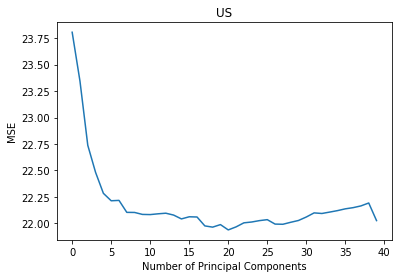

In [101]:
#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_trainreduced),1)), y_train, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 40):
    score = -1*model_selection.cross_val_score(regr, 
                       X_trainreduced[:,:i], y_train, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(np.log(mse))
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('US')

In [102]:
score = -1*model_selection.cross_val_score(regr, 
                       X_trainreduced[:,:20], y_train, cv=cv, scoring='neg_mean_squared_error').mean()
print(score)

3369257551.6690116


In [103]:
regr = LinearRegression()
regr.fit(X_trainreduced[:,:20], y_train)

#calculate RMSE
trainpred = regr.predict(X_trainreduced[:,:20])

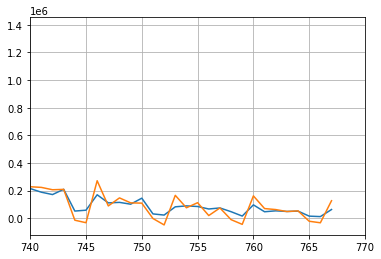

In [108]:
plt.plot(y_train)
plt.plot(trainpred)
plt.xlim(740, 770)
plt.grid()
plt.show()

In [109]:
predres = regr.predict(X_testreduced[:,:20])
print(predres)
print(y_test)

[[126865.08502683]
 [112996.88277889]
 [ 46809.23754102]
 [ 77555.5155745 ]
 [ 95778.46618681]
 [ -7907.6625088 ]
 [ -4007.06482178]
 [132531.2330792 ]]
[[63110.]
 [29619.]
 [37595.]
 [48318.]
 [52110.]
 [10462.]
 [ 5736.]
 [39024.]]


In [110]:
asx=np.linspace(len(yall)-lag-lag-1,len(yall)-1-lag,lag+1)

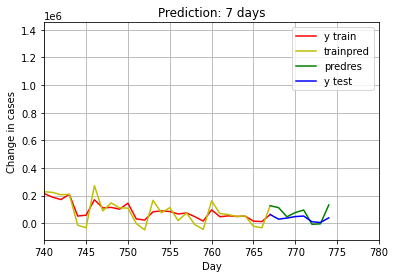

In [112]:
plt.plot(y_train, "-r", label='y train')
plt.plot(trainpred, "-y", label='trainpred')
plt.plot(asx,predres, "-g", label='predres')
plt.plot(asx,y_test, "-b", label='y test')
plt.legend(('y train','trainpred', 'predres', 'y test'))
plt.legend(loc = "upper right")
plt.title("Prediction: 7 days")
plt.xlabel("Day")
plt.ylabel("Change in cases")
plt.xlim(740, 780)
plt.grid() 
plt.show()

In [113]:
lag=30
X_shift=X
y_shift=y.shift(periods=-lag)
print(len(y_shift))
print(type(y))
print(type(y_shift))

782
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [114]:
# define predictor and response variables
Xall = X_shift
yall = y_shift

#scale predictor variables
pca = PCA()
X_reduced = pca.fit_transform(scale(Xall))

In [115]:
X_trainreduced=X_reduced[0:-lag-lag,:]
y_train=yall.iloc[0:-lag-lag,:].to_numpy()
X_testreduced=X_reduced[-(lag+lag+1):-lag,:]
y_test=yall.iloc[-(lag+lag+1):-lag,:].to_numpy()

Text(0.5, 1.0, 'US')

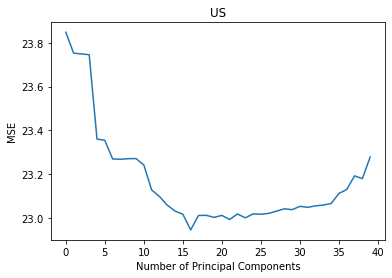

In [116]:
#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_trainreduced),1)), y_train, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 40):
    score = -1*model_selection.cross_val_score(regr, 
                       X_trainreduced[:,:i], y_train, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(np.log(mse))
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('US')

In [120]:
score = -1*model_selection.cross_val_score(regr, 
                       X_trainreduced[:,:16], y_train, cv=cv, scoring='neg_mean_squared_error').mean()
print(score)

9239407866.661283


In [121]:
regr = LinearRegression()
regr.fit(X_trainreduced[:,:16], y_train)

#calculate RMSE
trainpred = regr.predict(X_trainreduced[:,:16])

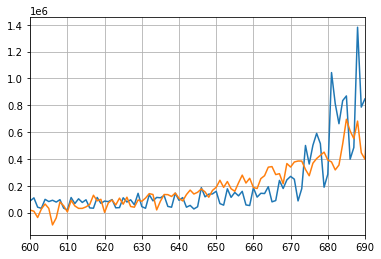

In [122]:
plt.plot(y_train)
plt.plot(trainpred)
plt.xlim(600,690)
plt.grid()
plt.show()

In [125]:
predres = regr.predict(X_testreduced[:,:16])

In [126]:
asx=np.linspace(len(yall)-lag-1-lag,len(yall)-1-lag,lag+1)

In [127]:
predres = regr.predict(X_testreduced[:,:16])
print(predres)
print(y_test)

[[  14200.97599274]
 [ 240490.33844374]
 [ 290409.7849965 ]
 [ 138885.74114489]
 [ 128056.79897432]
 [ 146935.38127145]
 [ 716012.34386393]
 [ 530199.30134777]
 [ 562098.72516935]
 [ 571693.03465398]
 [ 456216.51230101]
 [ 757114.52999943]
 [ 114133.96666148]
 [1311517.89803509]
 [ 747628.40698265]
 [ 755952.3740022 ]
 [ 759311.94076641]
 [ 482027.62908329]
 [ 952778.90851422]
 [ 560883.12495371]
 [ 741385.64039851]
 [ 758074.08057838]
 [ 606745.80897136]
 [ 625740.02615752]
 [ 390391.77262726]
 [ 649958.67351997]
 [ 589422.61231222]
 [ 566885.07309446]
 [ 711470.81732528]
 [ 562422.09068212]
 [ 413962.16491078]]
[[ 52055.]
 [ 58358.]
 [169892.]
 [111241.]
 [114888.]
 [101792.]
 [145287.]
 [ 31485.]
 [ 23025.]
 [ 82751.]
 [ 89481.]
 [ 85102.]
 [ 67024.]
 [ 74596.]
 [ 47435.]
 [ 15847.]
 [ 96853.]
 [ 47065.]
 [ 53725.]
 [ 49232.]
 [ 51565.]
 [ 15292.]
 [ 12028.]
 [ 63110.]
 [ 29619.]
 [ 37595.]
 [ 48318.]
 [ 52110.]
 [ 10462.]
 [  5736.]
 [ 39024.]]


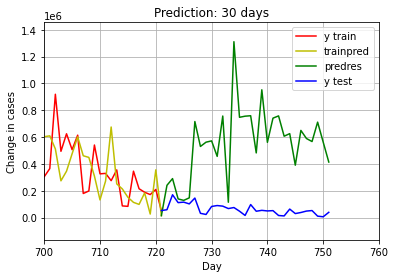

In [131]:
plt.plot(y_train, "-r", label='y train')
plt.plot(trainpred, "-y", label='trainpred')
plt.plot(asx,predres, "-g", label='predres')
plt.plot(asx,y_test, "-b", label='y test')
plt.legend(('y train','trainpred', 'predres', 'y test'))
plt.legend(loc = "upper right")
plt.title("Prediction: 30 days")
plt.xlabel("Day")
plt.ylabel("Change in cases")
plt.xlim(700, 760)
plt.grid()
plt.show()

# Appendix